

# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this notebook, I'm going to be analyzing the FBI Gun Dataset , which provides monthly counts of NICS Firearm Background Checks across U.S states. NICS is FBI's national system that checks records on persons who may be disqualified from receiving firearms. A background check on the buyer of a firearm is requested by the seller from the NCIS to confirm that  the buyer does not have a criminal record or isn't otherwise ineligible to purchase or own a firearm. Since launching in 1998, more than 300 million checks have been done, leading to more than 1.5 million denials.                                     

### Notes about this dataset:
1- Each column represents the type of transaction submitted to the NCIS. In addition to that, each type of transation is specified by the type of the firearm.                   

2- Types of transactions: **[handgun - long gun- other]**

3- Types of firearms: **[prepawn- redemption - rentals - private sales - return to seller - private sale]**
### Questions proposed 

<ul>
<li><a href="#Q1">1- What are the yearly background checks  counts since 1998 through 2017 ?</a></li>
<li><a href="#Q2">2- What is the overall trend of estimated gun sales ?</a></li>
<li><a href="#Q3">3- What is the type of gun most contributing to most recent year sales?</a></li>
<li><a href="#Q4">4- Which state has had the highest number of total registrations ?</a></li>
<li><a href="#Q5">5- Which states have had the highest growth in gun registrations ?</a></li>
<li><a href="#Q6">6- What census data is most associated with high gun per capita?</a></li>

<ul>

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling 
##  *Background checks data

### General Properties

In [2]:
# Loading data
df=pd.read_excel('gun-data.xlsx')

In [3]:
# Exploring first 5 records of the data
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# Getting number of records and number of columns 
(n_rows, n_columns)=df.shape
print('Number of records: ',n_rows)
print('Number of columns: ',n_columns)

Number of records:  12485
Number of columns:  27


In [5]:
# descriptive statistical summary of numerical variables
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [6]:
# Useful info about the data entries, columns, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

### Assessing Data Quality and Cleanliness

**(1) Assessing the columns relevance to the questions**

I notice that the dataset includes total monthly transactions requested by each state and also includes the details of these transactions regarding the type of firearm and the type of transaction check.  Columns in the dataset including these details won't be useful to answer some of the proposed questions, so these would  need to be excluded when necessary.

In [7]:
type(df['month'][0])

str

**(2) Assessing column datatypes**

* Columns 'permit' through 'return_to_seller_other except 'multiple' should be converted from floats to integers as they represent number of transactions or background checks which is always an integer.

* The 'month' column needs to be converted into datetime as well as be set as the index column of the dataframe since this is time series data that will be manipulated through the index column

In [8]:
df.duplicated().sum()

0

**(3) Assessing duplicate records**, no duplicates are found.

In [9]:
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

**(4) Assessing NULL or missing values**

looking closely at the numbers of missing values, I notice there are two categories of columns with missing values:

* First category of columns has relatively few missing values relative to the number of records.
* Second category includes columns having large or huge number of missing values compared to total, these are columns that have subnames ('rentals','permit_recheck,'returned','return_to_seller','private_sale',prepawn','redemption') - these are in descending order of missing values.

-) the first category should not introduce a problem since they miss few values and can simply be dropped or imputed.           
-) the second category would introduce a big problem as I cant simply drop them, so I referenced the original dataset to try to understand where the missing values originate from. It turns out that in early years of the NCIS launching(1998), the types of transcations were not yet recorded, in later years more transaction types were added to the dataset. I find that it is suitable now to impute missing values with zeros as no transactions of these kinds occured at those dates.


### Data Cleaning 

**(1) Imputing missing values with zeros and veirfying there are no more mising values after that**

In [10]:
df.fillna(0,inplace=True)
df.isnull().sum().all()

False

In [11]:
df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,0.0,14.0,2.0,0.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
12481,1998-11,Washington,1.0,0.0,65.0,286.0,0.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361
12482,1998-11,West Virginia,3.0,0.0,149.0,251.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408
12483,1998-11,Wisconsin,0.0,0.0,25.0,214.0,0.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241
12484,1998-11,Wyoming,8.0,0.0,45.0,49.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107


**(2) Fixing columns datatypess**

* change float columns into integers

In [12]:
dtypes=pd.DataFrame(data=df.dtypes,columns=['datatype'])
dtypes['index']=list(range(n_columns))

* First i want to view column names, datatypes along with their indices to determine the range of columns on which i will perform dataype conversion from float into integer, so i create a dataframe from the existing series of datatypes and add an index column to it.

In [13]:
dtypes

,datatype,index
month,object,0
state,object,1
permit,float64,2
permit_recheck,float64,3
handgun,float64,4
long_gun,float64,5
other,float64,6
multiple,int64,7
admin,float64,8
prepawn_handgun,float64,9


In [14]:
conversion_columns=df.columns.values[np.r_[2:7,8:26]]
for column_name in conversion_columns:
    df[column_name]=df[column_name].astype('int64')


* Now i can obtain the float columns names by slicing with numpy ranges and then apply conversion on the original dataframe df


In [15]:
df.dtypes

month                        object
state                        object
permit                        int64
permit_recheck                int64
handgun                       int64
long_gun                      int64
other                         int64
multiple                      int64
admin                         int64
prepawn_handgun               int64
prepawn_long_gun              int64
prepawn_other                 int64
redemption_handgun            int64
redemption_long_gun           int64
redemption_other              int64
returned_handgun              int64
returned_long_gun             int64
returned_other                int64
rentals_handgun               int64
rentals_long_gun              int64
private_sale_handgun          int64
private_sale_long_gun         int64
private_sale_other            int64
return_to_seller_handgun      int64
return_to_seller_long_gun     int64
return_to_seller_other        int64
totals                        int64
dtype: object

In [16]:
df.rename(columns={'month':'date'},inplace=True)

In [17]:
df.set_index('date',inplace=True)

In [18]:
df.index=pd.to_datetime(df.index)

* rename the 'month' column to 'date' and set it to be index of dataframe and then convert it into datetime

## *Census data

### General Properties

In [19]:
df_census=pd.read_csv('u.s.-census-data.csv')

In [20]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [21]:
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

### Assessing data quality and cleanliness

* First, It would be more convenient to transpose dataframe so that the census facts are converted into columns with which we can deal in terms of datatypes.

**(1) Assessing relevance of variables to the questions**

* Before actually transposing, I want to  investigate the relevance of the -to be columns- to the questions I am trying to solve

In [23]:
df_census.Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

* I find that not every census data here is of value to the problem, so I will remove the ones that do not represent population estimates at different years. After transposing , I will keep the first four columns.

**(2) Assessing datatypes of variables**

* varaibles represent either a count or a percentage so they need to be converted from strings into integers and floats respectively. But before that I will need to extract numbers only from each string.

**(3) Assessing presence of duplicate data**

In [24]:
df_census[df_census.duplicated()==True]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* It turns out that we will eventually drop these values

**(4) Assessing missing values**

* For the four columns I am interested in, I will check for missing values , otherwise I won't worry about them as the rest of columns will be dropped

### Data Cleaning

 **(1) Transposing the dataframe and setting census facts which is the first row in the transposed df to be the header**

In [25]:
df_census=df_census.T

In [26]:
header=df_census.iloc[0]
df_census.columns=header

* removing the first two rows (Fact, Fact notes) as we no longer need them

In [27]:
df_census=df_census[2:]

In [28]:
df_census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Keeping only the first four columns of interest 

In [29]:
df_census=df_census.iloc[:,0:4]

In [30]:
df_census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
Alaska,"741,894","710,249",4.50%,"710,231"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918"
California,"39,250,017","37,254,522",5.40%,"37,253,956"


In [31]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Population estimates, July 1, 2016,  (V2016)                                             50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                       50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    50 non-null object
Population, Census, April 1, 2010                                                        50 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


**(2) Fixing columns datatypes**

* Now dealing with datatypes, I need to convert objects into numbers so I will first extract numbers. Three columns are counts and one column is percentage. I will loop over the three columns and replace the commas and for percentage column I will replace the percentage character.

In [32]:
columns_to_convert=['Population estimates, July 1, 2016,  (V2016)','Population estimates base, April 1, 2010,  (V2016)','Population, Census, April 1, 2010']

In [33]:
for col in columns_to_convert:
    df_census[col]=df_census[col].str.replace(',','')
    df_census[col]=df_census[col].astype(int)

In [34]:
df_census['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']=df_census['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'].str.replace('%','').astype(float)

In [35]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Population estimates, July 1, 2016,  (V2016)                                             50 non-null int32
Population estimates base, April 1, 2010,  (V2016)                                       50 non-null int32
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    50 non-null float64
Population, Census, April 1, 2010                                                        50 non-null int32
dtypes: float64(1), int32(3)
memory usage: 1.4+ KB


**(1) Dealing with Duplicates and missing values in the new df**

In [36]:
df_census.duplicated().sum()

0

* No duplicates nor null exist in our new df.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
### Research Question 1 (What are the yearly background checks counts since 1998 through 2017?)

In [37]:
total_trans_df=df[['state','totals']]

* I don't need the details of trasactions here , just the total count and the states so I create a slice containing these two only.

In [38]:
yearly_trans=total_trans_df.resample('A').sum()

* Yearly checks over all the states is achieved through resampling the total checks by year and then summing over the states.

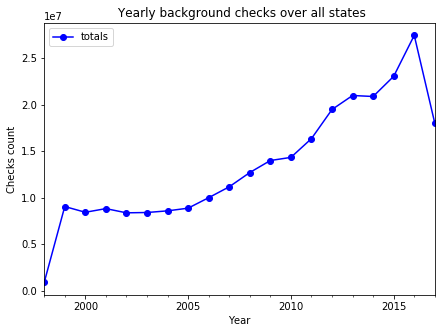

In [39]:
yearly_trans.plot(style='bo-',title=' Yearly background checks over all states',figsize=(7,5))
plt.xlabel('Year')
plt.ylabel('Checks count');

* Plotting the obtained values over the span of 20 years (1998 through 2017) shows an overall uptrend in background checks. there is a peak at 1999 which needs to be looked at closely.
* Gun checks noticably decrease in 2017 and the cause for that needs further investigations.

<a id='Q2'></a>

### Research Question 2 ( What is the overall trend of estimated gun sales ? )

**Note**: referencing https://github.com/nytimes/gunsales#getting-gun-sales-estimates-from-background-checks Sales estimates are calculated from handgun, long gun and multiple-gun background checks. Permit checks and other categories of background checks are excluded.
The authors of that NYT analysis describe how they used the NICS data to estimate gun sales:

To convert background checks into estimated sales, we relied on a method suggested in the Small Arms Survey by Jurgen Brauer, a professor at Georgia Regents University. **Each long gun and handgun check was counted as 1.1 sales. Each multiple-gun check was counted as two sales. Permit checks and other types of checks were omitted. The multiplier is an estimate based on Mr. Brauer's interviews with gun shop owners.**

In [40]:
sales_data=df.loc[:,['state','long_gun','handgun','multiple']]
for gun in ['long_gun','handgun']:
    sales_data[gun]=sales_data[gun].apply(lambda x:x*1.1)
sales_data['multiple']=sales_data['multiple'].apply(lambda x:x*2)
sales_data['estimated_sales']=sales_data['long_gun']+sales_data['handgun']+sales_data['multiple']

* First, extracting the columns that are needed to estimate gun sales into a new df 
* Second, applying the multiplier values to the corresponding columns as specified (Each long gun and handgun check was counted as 1.1 sales. Each multiple-gun check was counted as two sales.)
* Third, summing the new calculated column values to get the estimated sale for each record in the dataframe.

In [41]:
monthly_estimated_total_sales=sales_data.resample('M').sum()

* resampling data on monthly basis to plot it

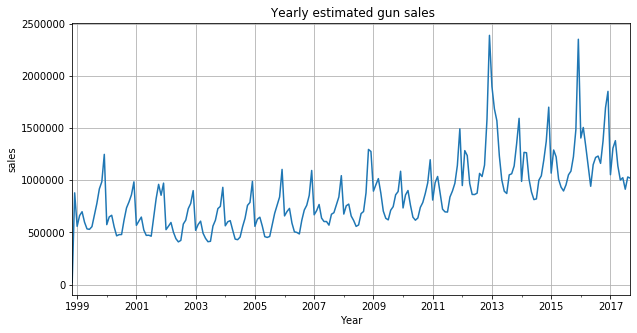

In [42]:
monthly_estimated_total_sales.estimated_sales.plot(title=' Yearly estimated gun sales',figsize=(10,5),grid=True)
plt.xlabel('Year')
plt.ylabel('sales');

* looks like there is a pattern of sales that keeps repeating within each year specifically spiking at the end of each year but there is an irregular spike around just the beginning of 2013 and 2016 of around 2.5 Million sales
* looking it up on the internet, Found out that on december 2012, new restrictions for gun buying were called for by President Obama and approved in 2013 where background checks were expanded and certain rifles were banned, it could possibly reflect that pushing for new restrictions can lead to an influx of new guns as buyers tend to try and beat the deadlines specified for the new measure according to NYT.

<a id='Q3'></a>

### Research Question 3 ( What is the type of gun most contributing to recent year sales? )

In [43]:
recent_sales=sales_data.loc['2017'].sum()
recent_sales

state              AlabamaAlaskaArizonaArkansasCaliforniaColorado...
long_gun                                                  3.7635e+06
handgun                                                  5.76697e+06
multiple                                                      338778
estimated_sales                                          9.86925e+06
dtype: object

* Retrieving sales data for the recent year

In [44]:
sales_percent_by_gun=recent_sales[['handgun','long_gun','multiple']]/recent_sales['estimated_sales']

* Calculating percentage of sales for guns  by dividing each gun sales by estimated total sales

In [45]:
sales_percent_by_gun

handgun      0.584338
long_gun     0.381336
multiple    0.0343266
dtype: object

In [46]:
labels = sales_percent_by_gun.index.values
sizes = sales_percent_by_gun

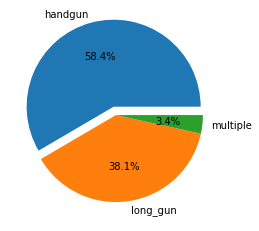

In [47]:
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0));

* Viewing percentage share of each gun on a pie chart exploding the highest sold gun and its percentage
* It turns out the handgun are most sold gun in 2017 with 58.4 percent of all sales

<a id='Q4'></a>

### Research Question 4  (Which state has had the highest number of total registrations ?)

In [48]:
df.groupby('state')['totals'].sum().sort_values(ascending=False).index[0]

'Kentucky'

* Approaching this question, first calculating sum of total registrations for each state then sorting descendingly so that the first state after sorting is the one with highest number of total reggistrations.

In [49]:
df.groupby('state')['totals'].sum().idxmax()

'Kentucky'

* An equivalent approach without sorting uses idxmax to retrieve the position of the max value element

* Turns out Kentuky is the state with higesht number of total gun registrations

<a id='Q5'></a>

### Research Question 5  (Which states have had the highest growth in gun registrations?)

In [50]:
def growth(sequence):
    change=[0]
    for i in range(1,sequence.shape[0]): 
        change.append(sequence[i]-sequence[i-1])
    return change

* First, I had to create a function that calculates yearly growth or change in regestrations, the implementation is more generally applicable to any sequence of data that changes over time.
* What it does to calculate change of a value over time is subtract  each value from the previous one except for the first value ofcourse as there is no previous value for that so we assume its change is zero.

In [51]:
yearly_trans_by_state=df.groupby('state').resample('A')['totals'].sum()

* Now I want to calculate the growth over time for each state, so groupby the state to get all total registrations associated with each state and then resample them by year to obtain yearly registrations for each state.

In [52]:
yearly_trans_by_state.loc['Alabama']

date
1998-12-31     36568
1999-12-31    246756
2000-12-31    221911
2001-12-31    230187
2002-12-31    221008
2003-12-31    225479
2004-12-31    229997
2005-12-31    235873
2006-12-31    243176
2007-12-31    245355
2008-12-31    299432
2009-12-31    317868
2010-12-31    308607
2011-12-31    336102
2012-12-31    431356
2013-12-31    563880
2014-12-31    621305
2015-12-31    737509
2016-12-31    616947
2017-12-31    336763
Freq: A-DEC, Name: totals, dtype: int64

In [53]:
states=df['state'].unique()
growth_data={}
for state in states:
    yearly_state_data=yearly_trans_by_state.loc[state]
    state_yearly_growth=growth(yearly_state_data)
    growth_data[state]=state_yearly_growth

* The last step is to iterate over states data and apply the growth function on each state data and store them in a dictionary for creating a dataframe with them later to compare changes among states.

In [54]:
reg_growth_df=pd.DataFrame(growth_data)

In [55]:
reg_growth_df.index=list(range(1998,2018))

In [56]:
reg_growth_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,210188,39088,156095,162864,815699,233510,80339,15459,21,247359,...,239441,627626,67036,20102,0,183360,121672,120277,163898,31990
2000,-24845,-3114,-25285,-14988,-88638,50204,377,-2247,-4,-13665,...,-29541,-47055,-10298,-1918,0,-20046,581,-6213,1152,-1181
2001,8276,0,-681,-3566,60063,41184,2103,1272,0,37361,...,-3894,9776,98,357,0,7673,27125,10163,1306,159
2002,-9179,-3166,-5322,-12638,-170179,-164942,3909,-231,-10,-14548,...,-7731,-8001,-5808,-174,1,-4392,32059,-3575,-8019,-869


* Now, I can compare registraion change of states for any specific year or set of years 
* To find which states have had the highest growth in gun registrations, I would use the mean estimate for gun resigtrations


In [57]:
highest_growth_states=reg_growth_df.mean().sort_values(ascending=False).head()

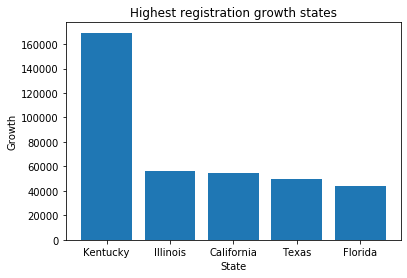

In [58]:
plt.bar(highest_growth_states.index,highest_growth_states);
plt.xlabel('State')
plt.ylabel('Growth')
plt.title('Highest registration growth states');

<a id='Q6'></a>

### Research Question 6  (What census data is most associated with high gun per capita?)

* Gun per capita means the number of gun sales per person, this would be done by dividing number of gun sales for each state by its population.
* Now i need to get population data from census data and add it to the dataframe I am working with

* Census data has estimates of population for 2016 and 2020 , I will choose 2016 to work with

* for 2016 population estimates, I need to extract gun totals for each state for 2016 

In [59]:
gun_data_2016=sales_data.loc['2016'].groupby('state').sum()

In [60]:
gun_data_2016.head(10)

,long_gun,handgun,multiple,estimated_sales
state,,,,
Alabama,134159.3,168435.3,13090,315684.6
Alaska,40575.7,41240.1,4632,86447.8
Arizona,119886.8,183462.4,15816,319165.2
Arkansas,90332.0,88268.4,8800,187400.4
California,610005.0,616390.5,0,1226395.5
Colorado,198028.6,266752.2,28586,493366.8
Connecticut,48194.3,134612.5,0,182806.8
Delaware,23920.6,28131.4,2068,54120.0
District of Columbia,52.8,742.5,16,811.3


In [61]:
gun_data_2016=gun_data_2016.assign(population=df_census['Population estimates, July 1, 2016,  (V2016)'])

In [62]:
gun_data_2016.head()

,long_gun,handgun,multiple,estimated_sales,population
state,,,,,
Alabama,134159.3,168435.3,13090,315684.6,4863300.0
Alaska,40575.7,41240.1,4632,86447.8,741894.0
Arizona,119886.8,183462.4,15816,319165.2,6931071.0
Arkansas,90332.0,88268.4,8800,187400.4,2988248.0
California,610005.0,616390.5,0,1226395.5,39250017.0


In [63]:
gun_data_2016.isnull().sum()

long_gun           0
handgun            0
multiple           0
estimated_sales    0
population         5
dtype: int64

* making sure there are no nulls before doing the divison

In [64]:
gun_data_2016['gun per capita']=gun_data_2016['estimated_sales']/gun_data_2016['population']

In [65]:
gun_data_2016.sort_values('gun per capita',ascending=False).head()

,long_gun,handgun,multiple,estimated_sales,population,gun per capita
state,,,,,,
Alaska,40575.7,41240.1,4632,86447.8,741894.0,0.116523
South Dakota,54474.2,40172.0,4368,99014.2,865454.0,0.114407
West Virginia,89215.5,101336.4,10566,201117.9,1831102.0,0.109834
Montana,62517.4,41301.7,5356,109175.1,1042520.0,0.104722
Wyoming,28396.5,24825.9,2590,55812.4,585501.0,0.095324


* We can also view gun per capita as gun sales per 1000 person for convenience by multiplying gun per capita by 1000

In [66]:
gun_per_K=gun_data_2016['gun per capita']*1000
highest_GPC_states=gun_per_K.sort_values(ascending=False).head()

In [67]:
highest_GPC_states

state
Alaska           116.523115
South Dakota     114.407236
West Virginia    109.834351
Montana          104.722307
Wyoming           95.324175
Name: gun per capita, dtype: float64

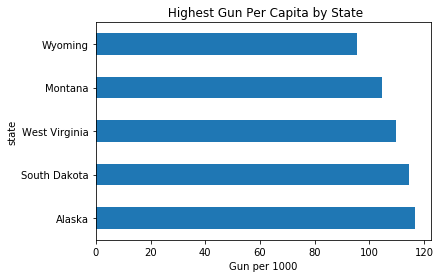

In [68]:
highest_GPC_states.plot(kind='barh', title=' Highest Gun Per Capita by State')
plt.xlabel('Gun per 1000');

* sorting descendingly based on gun per capita to get the highest scoring state.

* I will do the same steps to calculate GPC for 2010 sales

In [69]:
gun_data_2010=sales_data.loc['2010'].groupby('state').sum()
gun_data_2010=gun_data_2010.assign(population=df_census['Population estimates base, April 1, 2010,  (V2016)'])
gun_data_2010['gun per capita']=gun_data_2010['estimated_sales']/gun_data_2010['population']
gun_per_K_10=gun_data_2010['gun per capita']*1000
highest_GPC_states_10=gun_per_K_10.sort_values(ascending=False).head()

In [70]:
highest_GPC_states_10

state
Alaska           95.494256
Montana          85.732161
South Dakota     80.879519
West Virginia    75.966468
Wyoming          73.294286
Name: gun per capita, dtype: float64

<a id='conclusions'></a>
## Conclusions

### Summarized  report of results of the analysis 

**Trend of Background checks over the years**
* Plotting Background checks counts over the span of 20 years (1998 through 2017) shows an overall uptrend in background checks.
* There is a peak at 1999 which needs to be looked at closely.
* Gun checks noticably decrease in 2017 and the cause for that needs further investigations.

**Trend of estimated gun sales**
* Gun sales tend to be cyclic with a repeating pattern each year, they tend to spike just before the new year starts in december approx.
* There is an irregular shooting spike around just the beginning of 2013 and 2016 of around 2.5 Million sales
* The new restrictions for gun buying that were approved in 2013 could be acssociated with increased gun sales to beat the deadline for the new measures conducted, but there could also be other factors involved in this spike.

**Most sold gun in 2017**
* It turns out the handgun are most sold guns in 2017 with 58.4 % of all sales in that year

**Highest Background checks total registrations**
* Turns out Kentuky is the state with higesht number of total gun registrations

**Highest growth in total background checks registrations**
* Kentuky also is the state with highest mean of  registrations  growth over the span of 20 years. There might be other estimators of growth other than the mean.

**High Gun Per Capita**
* In 2010, Alaska had the highest GPC of 95.5 per 1000 person, followed by Montana of 85.7
* In 2016, again Alaska still had the highest GPC of 116.5 per 1000 person, followed by Soth Dakota of 114.4.
* That is 21 GPC within 6 years or almost 22 % increase in GPC